In [3]:
import cv2

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:

image = cv2.imread('Aslam.jpg', 0)


In [6]:

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


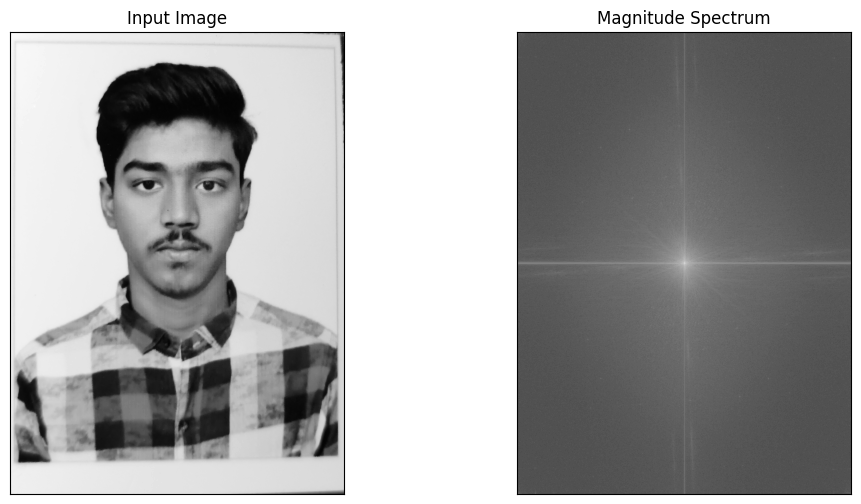

In [7]:

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Aslam.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Convert image to float32 for more accurate calculations
image = image.astype(np.float32)

# Generate Gaussian noise
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, image.shape)

# Add the noise to the image
noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

# Define an example blur kernel (e.g., Gaussian blur kernel)
def create_blur_kernel(size=5):
    kernel = np.ones((size, size), np.float32) / (size * size)
    return kernel

# Inverse filtering to attempt to recover the original image
def inverse_filter(noisy_image, blur_kernel):
    # Convert blur_kernel to float32 for more accurate calculations
    blur_kernel = blur_kernel.astype(np.float32)
    
    # Pad the kernel to match the size of the image
    kernel_padded = np.zeros_like(noisy_image, dtype=np.float32)
    k_h, k_w = blur_kernel.shape
    kernel_padded[:k_h, :k_w] = blur_kernel

    # Apply the Fourier Transform
    noisy_image_fft = np.fft.fft2(noisy_image)
    blur_kernel_fft = np.fft.fft2(kernel_padded)
    
    # Avoid division by zero
    blur_kernel_fft = np.where(blur_kernel_fft == 0, 1, blur_kernel_fft)
    
    # Apply inverse filtering
    restored_image_fft = noisy_image_fft / blur_kernel_fft
    
    # Apply Inverse Fourier Transform
    restored_image = np.fft.ifft2(restored_image_fft)
    return np.clip(np.abs(restored_image), 0, 255).astype(np.uint8)

# Example usage with a blur kernel
blur_kernel = create_blur_kernel(size=5)
restored_image_inverse = inverse_filter(noisy_image, blur_kernel)

cv2.imshow('Restored Image (Inverse Filter)', restored_image_inverse)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
from skimage.restoration import wiener
import cv2
import numpy as np

# Load the image
image = cv2.imread('Aslam.jpg', cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Convert image to float32 for more accurate calculations
image = image.astype(np.float32)

# Generate Gaussian noise
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, image.shape)

# Add the noise to the image
noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

# Define an example blur kernel (e.g., Gaussian blur kernel)
def create_blur_kernel(size=5):
    kernel = np.ones((size, size), np.float32) / (size * size)
    return kernel

# Apply Wiener filter
def apply_wiener_filter(noisy_image, psf, noise_var):
    # Convert noisy image to float32
    noisy_image_float = noisy_image.astype(np.float32)
    
    # Apply Wiener filter
    restored_image_wiener = wiener(noisy_image_float, psf, noise_var)
    
    return np.clip(restored_image_wiener, 0, 255).astype(np.uint8)

# Create blur kernel
blur_kernel = create_blur_kernel(size=5)

# Estimate the noise variance
noise_var = sigma ** 2

# Apply Wiener filter
restored_image_wiener = apply_wiener_filter(noisy_image, blur_kernel, noise_var)

# Display the Wiener-filtered image
cv2.imshow('Restored Image (Wiener Filter)', restored_image_wiener)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.2/12.9 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/12.9 MB 7.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.9 MB 8.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/12.9 MB 8.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.2/12.9 MB 9.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.5/12.9 MB 8.8 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/12.9 MB 10.0 MB/s eta 0:00:01
   ---------- ----------------------------- 3.4/12.9 MB 9.4 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.9 MB 10.4 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 10.4 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.9 MB 10.4 MB/s eta 0:00:01
   ----------------- ---------------------- 5.6/12.9 MB 10.2 MB/s eta 0:00:01
 